<a href="https://colab.research.google.com/github/Nisarg111/Time-Series/blob/main/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day  2

Simple Moving Average is used for smoothening of graph done using rolling()
One of the argument of rolling function is min-period which is used to replace the NaN value in the output. If min-period is not used then plotting of graph will not start from the beginning the first win.size-1 points will be not included in graph.


In [ ]:
import yfinance as yf
import pandas as pd

data_tesla = yf.download('TSLA')
data_tesla.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
data_tesla['Open'].rolling(window=5).mean().head(20)
# Window size - 1 is Nan

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06    1.503867
2010-07-07    1.469200
2010-07-08    1.340533
2010-07-09    1.241600
2010-07-12    1.174267
2010-07-13    1.139467
2010-07-14    1.160000
2010-07-15    1.210667
2010-07-16    1.252267
2010-07-19    1.297867
2010-07-20    1.357333
2010-07-21    1.393600
2010-07-22    1.401067
2010-07-23    1.407600
2010-07-26    1.409333
2010-07-27    1.396800
Name: Open, dtype: float64

In [ ]:
data_tesla['Open'].rolling(window=5,min_periods=1).mean().head(20)

Date
2010-06-29    1.266667
2010-06-30    1.493000
2010-07-01    1.550889
2010-07-02    1.546500
2010-07-06    1.503867
2010-07-07    1.469200
2010-07-08    1.340533
2010-07-09    1.241600
2010-07-12    1.174267
2010-07-13    1.139467
2010-07-14    1.160000
2010-07-15    1.210667
2010-07-16    1.252267
2010-07-19    1.297867
2010-07-20    1.357333
2010-07-21    1.393600
2010-07-22    1.401067
2010-07-23    1.407600
2010-07-26    1.409333
2010-07-27    1.396800
Name: Open, dtype: float64

# difference between min_period =0 and =1
 min_period argument in the context of time series forecasting specifies the minimum number of consecutive data points that must be available for a prediction to be made.

    min_period = 0:
        The model will attempt to make a prediction for every single data point, even if there is only one data point available.
        This can be useful if you have a very short time series and you need to make a prediction based on limited data.
        However, it can also lead to overfitting, as the model may not have enough information to make an accurate prediction.

    min_period = 1:
        The model will only make a prediction if there are at least two data points available.
        This is the default setting for most time series forecasting models.
        It provides a balance between overfitting and underfitting.

In general, it is recommended to use min_period = 1 unless you have a very short time series or you have a specific reason to use a different value.


<Axes: xlabel='Date'>

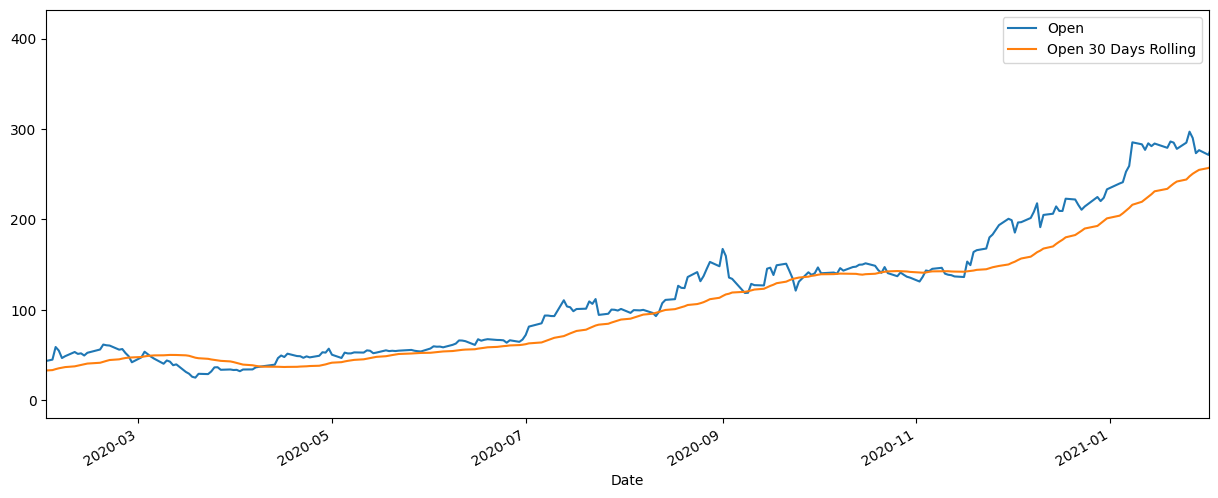

In [ ]:
# plotting graph
data_tesla['Open 30 Days Rolling'] = data_tesla['Open'].rolling(window=30,min_periods=1).mean()
# data_tesla['Open 30 Days Rolling'].head()
data_tesla[['Open', 'Open 30 Days Rolling']].plot(xlim=['2020-02-01','2021-02-01'],figsize=(15,6))

# Disadvantage of Simple rolling average in terms of Time Seris data
It gives equal importance to all data points but in terms of Time Series data we should give more importance/weigth to recent data

# Cummulative Moving Average


In [ ]:
ar = [1, 2, 3, 4, 5]
df = pd.DataFrame(ar, columns=['Data'])
df['Cumulative Moving Average'] = df['Data'].expanding(min_periods=3).mean()
df['Rolling Average'] = df['Data'].rolling(window=3).mean()
df[['Cumulative Moving Average','Rolling Average']].head()



,Cumulative Moving Average,Rolling Average
0,NaN,NaN
1,NaN,NaN
2,2.0,2.0
3,2.5,3.0
4,3.0,4.0


<Axes: xlabel='Date'>

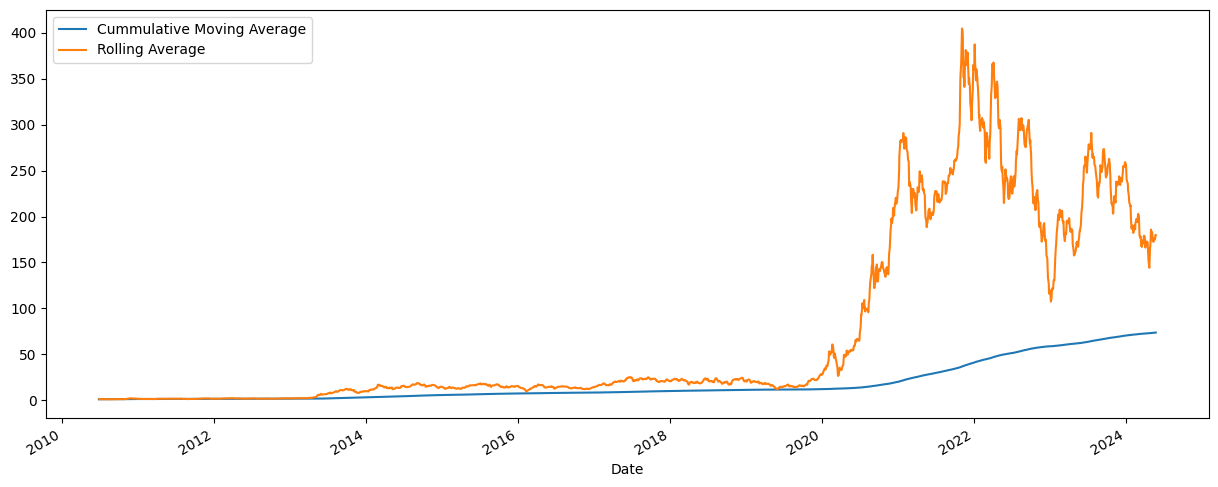

In [ ]:
data_tesla['Cummulative Moving Average'] = data_tesla['Open'].expanding().mean()
data_tesla['Rolling Average'] = data_tesla['Open'].rolling(window=3).mean()
data_tesla[['Cummulative Moving Average','Rolling Average']].plot(figsize=(15,6))

# Difference between SRA and CMA
The Simple Rolling Average (also known as the Simple Moving Average, SMA) is calculated by taking the average of a fixed number of recent data points.

The Cumulative Moving Average is the average of all data points up to the current point in time.

More: https://chatgpt.com/share/dc975562-6a36-4b92-b6ca-6bf64777a458

#-----------------------------------------------------

# Exponential Moving Average
Exponential moving average (EMA) is a type of moving average that places a greater weight on recent observations compared to older observations. This is achieved by applying a weighting factor to each observation, with the most recent observation receiving the highest weight.

The formula for EMA is: EMA(t) = α * Xt + (1 - α) * EMA(t-1)

where:

    EMA(t) is the exponential moving average at time t
    α is the smoothing factor (between 0 and 1)
    Xt is the value of the time series at time t
    EMA(t-1) is the exponential moving average at time t-1

The smoothing factor α determines the weight given to the most recent observation. A higher value of α places more weight on recent observations, while a lower value of α places more weight on older observations.



<Axes: xlabel='Date'>

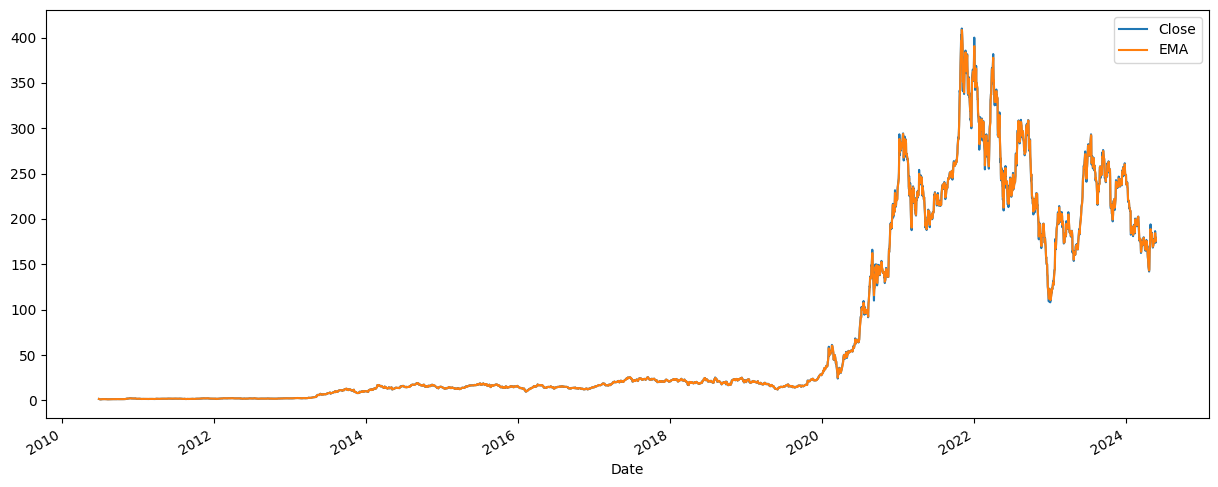

In [ ]:
data_tesla['EMA'] = data_tesla['Close'].ewm(alpha=0.8, adjust=False).mean()
data_tesla[['Close', 'EMA']].plot(figsize=(15,6))

# Fow EWMA we use EMA with span where span means the decaying period

<Axes: xlabel='Date'>

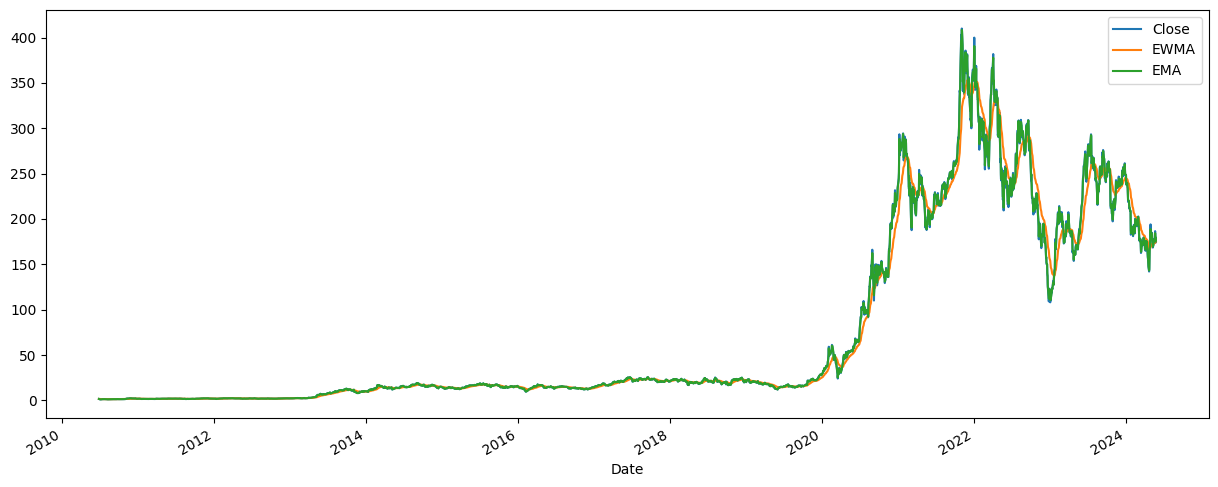

In [ ]:
data_tesla['EWMA'] = data_tesla['Close'].ewm(span=30, adjust=False).mean()
data_tesla[['Close', 'EWMA','EMA']].plot(figsize=(15,6))
# Here span means 30 days